In [1]:
import xgboost as xgb
from xgboost import plot_importance, plot_tree
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

In [2]:
import pandas as pd 
data=pd.read_csv('AEP_hourly1.csv',index_col=[0], parse_dates=[0])
df=data.copy()

In [3]:
df.head()

,AEP_MW
Datetime,
2004-12-31 01:00:00,13478.0
2004-12-31 02:00:00,12865.0
2004-12-31 03:00:00,12577.0
2004-12-31 04:00:00,12517.0
2004-12-31 05:00:00,12670.0


<Axes: title={'center': 'energy consamption'}, xlabel='Datetime'>

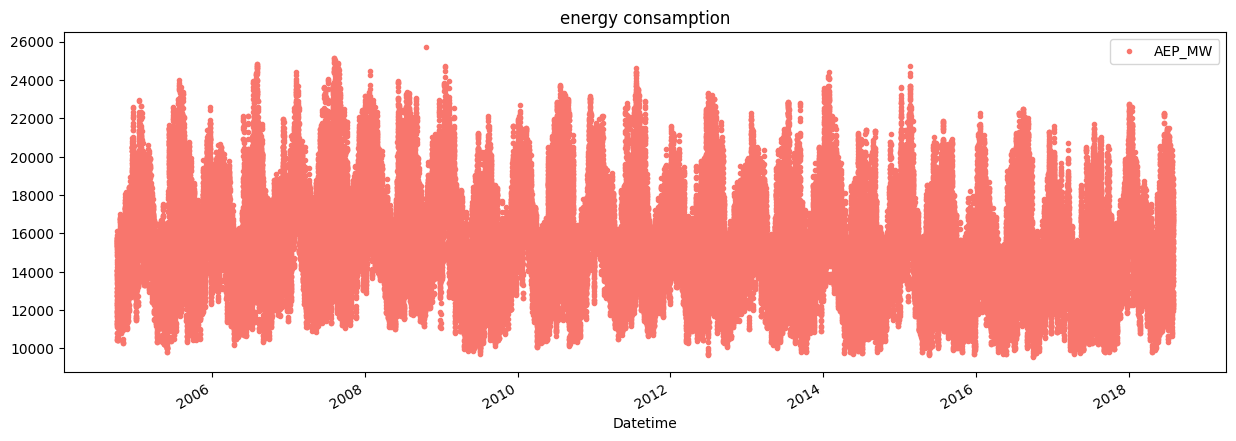

In [4]:

df.plot(style='.', figsize=(15,5), color="#F8766D", title='energy consamption')

In [5]:
split_date = '01-Jan-2015'
df_train = df.loc[df.index <= split_date]
df_test = df.loc[df.index > split_date]

<Axes: title={'center': 'energy consamption'}, xlabel='Datetime'>

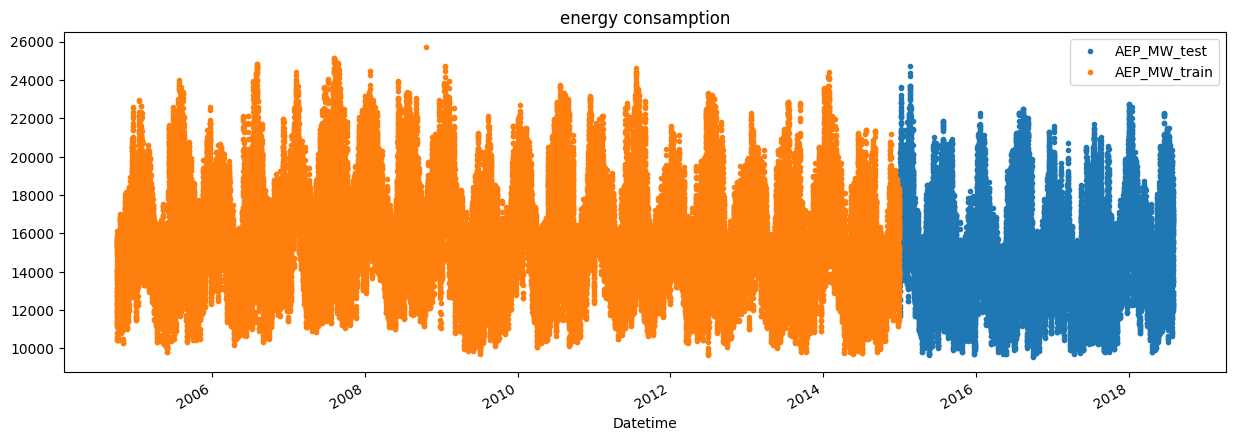

In [6]:

df_test = df_test.rename(columns={'PJME_MW': 'TEST SET'})
df_train = df_train.rename(columns={'PJME_MW': 'TRAINING SET'})

df_combined = df_test.join(df_train, how='outer', lsuffix='_test', rsuffix='_train')


df_combined.plot(figsize=(15,5), title='energy consamption', style='.')


In [7]:
def create_features(df, label=None):
    df['date'] = df.index
    df['hour'] = df['date'].dt.hour
    df['dayofweek'] = df['date'].dt.dayofweek
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofyear'] = df['date'].dt.dayofyear
    df['dayofmonth'] = df['date'].dt.day
    
    
    X = df[['hour','dayofweek','quarter','month','year',
           'dayofyear','dayofmonth']]
    if label:
        y = df[label]
        return X, y
    return X

In [8]:
X_train, y_train = create_features(df_train, label='AEP_MW')
X_test, y_test = create_features(df_test, label='AEP_MW')

In [9]:
X_test

,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth
Datetime,,,,,,,
2015-12-31 01:00:00,1,3,4,12,2015,365,31
2015-12-31 02:00:00,2,3,4,12,2015,365,31
2015-12-31 03:00:00,3,3,4,12,2015,365,31
2015-12-31 04:00:00,4,3,4,12,2015,365,31
2015-12-31 05:00:00,5,3,4,12,2015,365,31
...,...,...,...,...,...,...,...
2018-01-01 20:00:00,20,0,1,1,2018,1,1
2018-01-01 21:00:00,21,0,1,1,2018,1,1
2018-01-01 22:00:00,22,0,1,1,2018,1,1


In [31]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [35]:
params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'max_depth': 6,
    'learning_rate': 0.1,
    'n_estimators': 1000,
    'verbosity': 0
}

In [36]:
bst = xgb.train(
    params,
    dtrain,  
    num_boost_round=1000,
    evals=[(dtest, 'test')],        
    early_stopping_rounds=50
)

[0]	test-rmse:2539.21340


[1]	test-rmse:2414.86237
[2]	test-rmse:2307.60195
[3]	test-rmse:2217.54867
[4]	test-rmse:2142.89895
[5]	test-rmse:2079.20750
[6]	test-rmse:2027.71197
[7]	test-rmse:1976.34820
[8]	test-rmse:1940.32733
[9]	test-rmse:1895.25427
[10]	test-rmse:1869.92544
[11]	test-rmse:1837.74039
[12]	test-rmse:1821.84123
[13]	test-rmse:1801.72828
[14]	test-rmse:1780.46953
[15]	test-rmse:1762.14351
[16]	test-rmse:1752.86404
[17]	test-rmse:1743.50521
[18]	test-rmse:1731.33416
[19]	test-rmse:1721.36205
[20]	test-rmse:1711.03564
[21]	test-rmse:1708.36241
[22]	test-rmse:1704.43624
[23]	test-rmse:1701.88044
[24]	test-rmse:1696.58253
[25]	test-rmse:1687.53078
[26]	test-rmse:1681.50646
[27]	test-rmse:1679.34774
[28]	test-rmse:1678.74429
[29]	test-rmse:1675.23904
[30]	test-rmse:1672.65351
[31]	test-rmse:1669.62941
[32]	test-rmse:1668.99576
[33]	test-rmse:1666.64126
[34]	test-rmse:1664.70224
[35]	test-rmse:1659.70981
[36]	test-rmse:1656.37782
[37]	test-rmse:1654.16919
[38]	test-rmse:1651.77889
[39]	test-rmse:1649.6

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

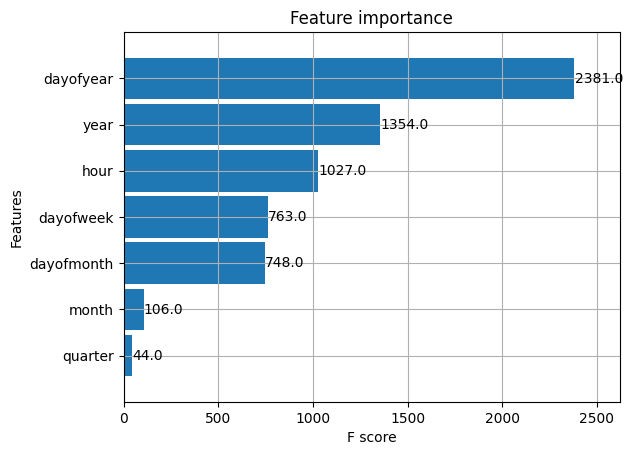

In [37]:
plot_importance(bst, height=0.9)

In [38]:
X_test

,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth
Datetime,,,,,,,
2015-12-31 01:00:00,1,3,4,12,2015,365,31
2015-12-31 02:00:00,2,3,4,12,2015,365,31
2015-12-31 03:00:00,3,3,4,12,2015,365,31
2015-12-31 04:00:00,4,3,4,12,2015,365,31
2015-12-31 05:00:00,5,3,4,12,2015,365,31
...,...,...,...,...,...,...,...
2018-01-01 20:00:00,20,0,1,1,2018,1,1
2018-01-01 21:00:00,21,0,1,1,2018,1,1
2018-01-01 22:00:00,22,0,1,1,2018,1,1


In [42]:
input_data = pd.DataFrame([[1, 2, 3, 5, 2015, 5, 5]], columns=["hour", "dayofweek", "quarter", "month", "year", "dayofyear", "dayofmonth"])

dinput = xgb.DMatrix(input_data)
e = bst.predict(dinput)
e

array([16926.69], dtype=float32)

In [45]:
X_test = X_test[X_train.columns]

dtest = xgb.DMatrix(X_test)

df_test['MW_Prediction'] = bst.predict(dtest)
df_all = pd.concat([df_test, df_train], sort=False)

<Axes: xlabel='Datetime'>

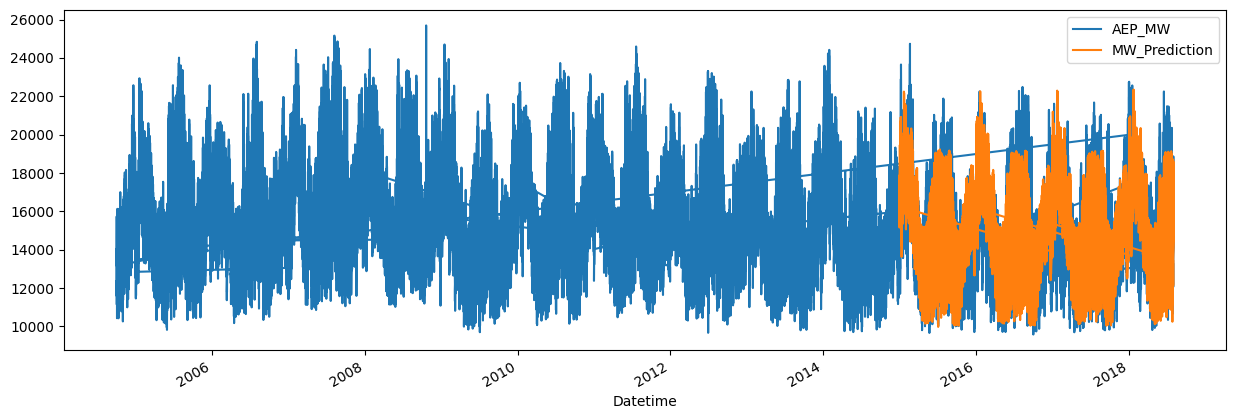

In [46]:

df_all[['AEP_MW','MW_Prediction']].plot(figsize=(15, 5))

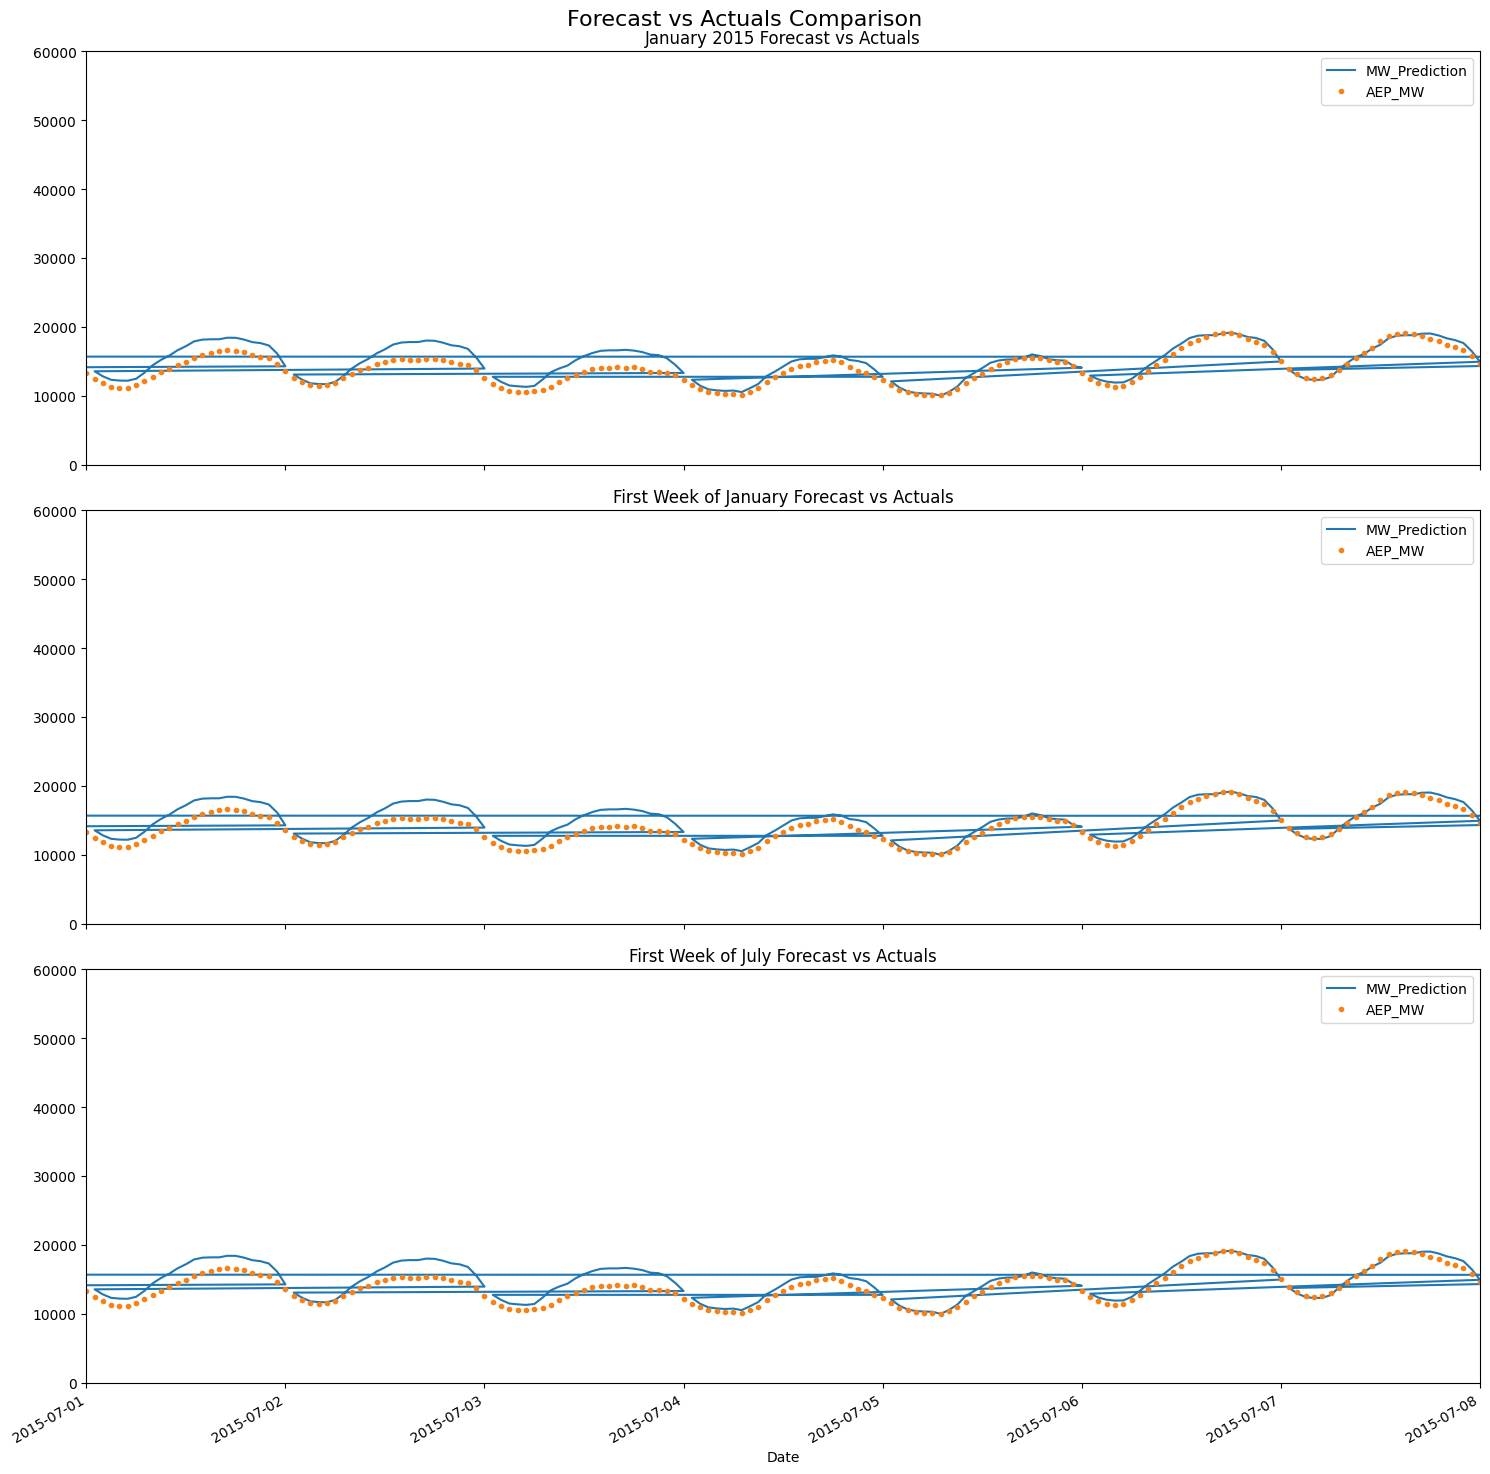

In [47]:
fig, axes = plt.subplots(3, 1, figsize=(15, 15), sharex=True) 
fig.suptitle("Forecast vs Actuals Comparison", fontsize=16)


df_all[["MW_Prediction", "AEP_MW"]].plot(ax=axes[0], style=["-", "."])
axes[0].set_xbound(lower='01-01-2015', upper='02-01-2015')
axes[0].set_ylim(0, 60000)
axes[0].set_title("January 2015 Forecast vs Actuals")


df_all[["MW_Prediction", "AEP_MW"]].plot(ax=axes[1], style=["-", "."])
axes[1].set_xbound(lower='01-01-2015', upper='01-08-2015')
axes[1].set_ylim(0, 60000)
axes[1].set_title("First Week of January Forecast vs Actuals")


df_all[["MW_Prediction", "AEP_MW"]].plot(ax=axes[2], style=["-", "."])
axes[2].set_xbound(lower='07-01-2015', upper='07-08-2015')
axes[2].set_ylim(0, 60000)
axes[2].set_title("First Week of July Forecast vs Actuals")
axes[2].set_xlabel("Date")  


plt.tight_layout()

plt.show()

In [49]:
mean_squared_error(y_true=df_test['AEP_MW'],y_pred=df_test['MW_Prediction'])

2879456.802639596

In [50]:
mean_absolute_error(y_true=df_test['AEP_MW'],y_pred=df_test['MW_Prediction'])

1309.0570085249412

In [52]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [53]:
mean_absolute_percentage_error(y_true=df_test['AEP_MW'],y_pred=df_test['MW_Prediction'])

np.float64(8.855968421641249)

In [54]:
df_test['error'] = df_test['AEP_MW'] - df_test['MW_Prediction']
df_test['abs_error'] = df_test['error'].apply(np.abs)
error_by_day = df_test.groupby(['year','month','dayofmonth']) \
    .mean()[['AEP_MW','MW_Prediction','error','abs_error']]

In [55]:
error_by_day

AEP_MW  MW_Prediction        error    abs_error
year month dayofmonth                                                       
2015 1     1           15968.304348   16589.480469  -621.174720   865.607040
           2           15515.791667   17901.808594 -2386.017253  2386.017253
           3           14698.250000   17381.273438 -2683.024007  2683.024007
           4           13634.875000   16364.437500 -2729.562378  2729.562378
           5           17810.083333   18737.458984  -927.376912   950.859172
...                             ...            ...          ...          ...
2018 7     30          15368.083333   15454.081055   -85.997355   456.837850
           31          15180.291667   15483.140625  -302.848307   820.466309
     8     1           15151.166667   15829.454102  -678.288045   789.078735
           2           15687.666667   15790.094727  -102.427775   232.291138
           3           14809.000000   14429.142578   379.857422   379.857422

[1311 rows x 4 columns]

In [56]:
error_by_day.sort_values('error', ascending=True).head(10)

AEP_MW  MW_Prediction        error    abs_error
year month dayofmonth                                                       
2017 1     25          14862.458333   20400.509766 -5538.052246  5538.052246
           22          12295.541667   17785.392578 -5489.849772  5489.849772
2018 1     23          14998.041667   20330.537109 -5332.495931  5332.495931
2017 1     24          15152.833333   20463.935547 -5311.103353  5311.103353
           3           14456.666667   19725.324219 -5268.657308  5268.657308
           23          14428.125000   19648.978516 -5220.853923  5220.853923
2018 1     22          14509.750000   19700.291016 -5190.541097  5190.541097
2017 2     7           14051.250000   18683.179688 -4631.930257  4631.930257
     1     26          15467.083333   19912.406250 -4445.322998  4445.322998
     2     8           14326.333333   18709.572266 -4383.240234  4383.240234

In [57]:
error_by_day.sort_values('abs_error', ascending=True).head(10)

AEP_MW  MW_Prediction       error   abs_error
year month dayofmonth                                                     
2017 12    7           16638.250000   16722.306641  -84.057902  139.221151
2015 9     21          13661.416667   13789.229492 -127.813070  140.555176
2016 12    22          15903.708333   16010.575195 -106.867594  160.864421
2017 5     21          12105.500000   12147.984375  -42.484701  179.234049
     3     18          14078.750000   13931.286133  147.463257  181.506063
2015 10    12          13301.583333   13484.554688 -182.970947  195.084554
2017 4     23          11660.375000   11810.512695 -150.138346  195.089193
2018 4     28          12237.583333   12251.323242  -13.740031  198.155070
2015 5     3           11632.500000   11754.535156 -122.035238  198.405924
     10    5           13259.791667   13409.102539 -149.311198  207.615072

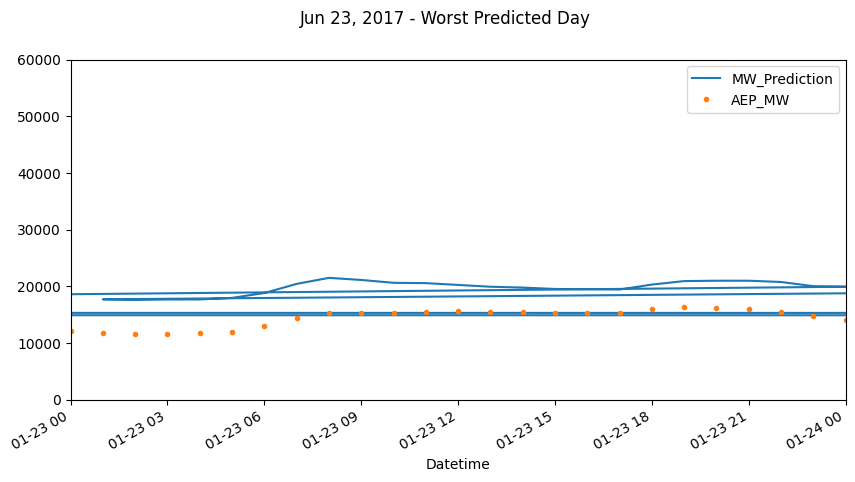

In [58]:
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(10)
df_all[['MW_Prediction','AEP_MW']].plot(ax=ax,style=['-','.'])
ax.set_ylim(0, 60000)
ax.set_xbound(lower='01-23-2017', upper='01-24-2017')
plot = plt.suptitle('Jun 23, 2017 - Worst Predicted Day')

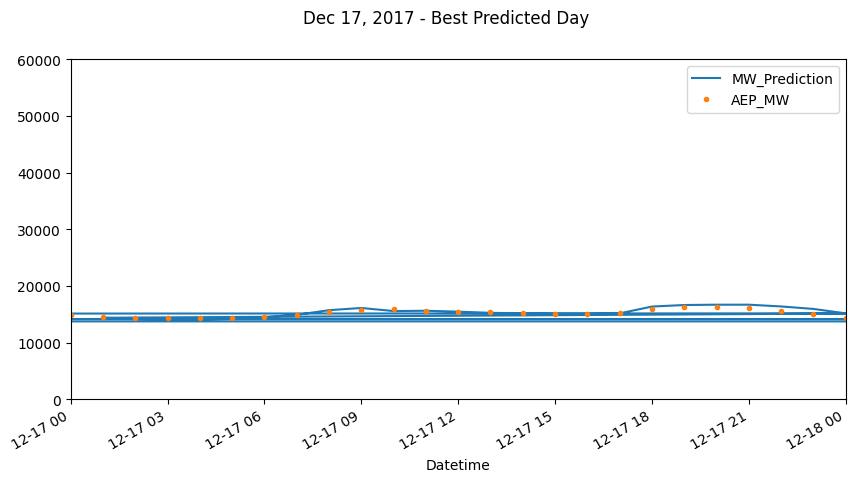

In [59]:
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(10)
df_all[['MW_Prediction','AEP_MW']].plot(ax=ax,style=['-','.'])
ax.set_ylim(0, 60000)
ax.set_xbound(lower='12-17-2017', upper='12-18-2017')
plot = plt.suptitle('Dec 17, 2017 - Best Predicted Day')

In [27]:
#import pickle
#pickle.dump(reg,open('model.pkl','wb'))
#model=pickle.load(open('model.pkl','rb'))